In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OnlineRetail.xlsx to OnlineRetail (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('OnlineRetail.xlsx', header=0)
print(df.head)


<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df=df.drop(columns=['InvoiceNo'])


In [ ]:
df.count()

,0
StockCode,541909
Description,540455
Quantity,541909
InvoiceDate,541909
UnitPrice,541909
CustomerID,406829
Country,541909


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.count()

number of duplicate rows:  (5848, 7)


,0
StockCode,541909
Description,540455
Quantity,541909
InvoiceDate,541909
UnitPrice,541909
CustomerID,406829
Country,541909


In [ ]:
df = df.drop_duplicates()
print(df.count())

StockCode      536061
Description    534608
Quantity       536061
InvoiceDate    536061
UnitPrice      536061
CustomerID     401564
Country        536061
dtype: int64


In [ ]:
print(df.isnull().sum())

StockCode           0
Description      1453
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134497
Country             0
dtype: int64


In [ ]:
df = df.dropna(subset=['CustomerID'])
print(df.count())

StockCode      401564
Description    401564
Quantity       401564
InvoiceDate    401564
UnitPrice      401564
CustomerID     401564
Country        401564
dtype: int64


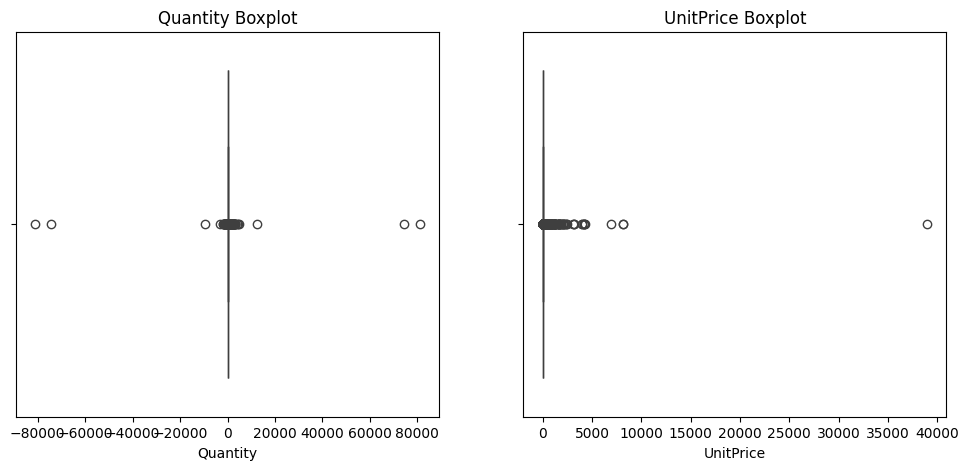

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('UnitPrice Boxplot')

plt.show()

In [ ]:
Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR = Q3_qty - Q1_qty
print(IQR)

10.0


In [ ]:
df = df[~((df['Quantity'] < (Q1_qty - 1.5 * IQR)) | (df['Quantity'] > (Q3_qty + 1.5 * IQR)))]

In [ ]:
Q1_up = df['UnitPrice'].quantile(0.25)
Q3_up = df['UnitPrice'].quantile(0.75)
IQR = Q3_up - Q1_up

df = df[~((df['UnitPrice'] < (Q1_up - 1.5 * IQR)) | (df['UnitPrice'] > (Q3_up + 1.5 * IQR)))]

In [ ]:
df.count()

,0
StockCode,339421
Description,339421
Quantity,339421
InvoiceDate,339421
UnitPrice,339421
CustomerID,339421
Country,339421


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


<ipython-input-72-18878337d6d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


[link text](https://)

In [ ]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df.head()


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday


In [ ]:
weekday_sales = df.groupby('Day')['TotalPrice'].sum()

In [ ]:
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_revenue_products = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(10)


,Quantity,UnitPrice,CustomerID,TotalPrice,Year
Quantity,1.000000,-0.344034,-0.135428,0.534946,0.024661
UnitPrice,-0.344034,1.000000,-0.008021,0.331621,-0.027701
CustomerID,-0.135428,-0.008021,1.000000,-0.113869,-0.036840
TotalPrice,0.534946,0.331621,-0.113869,1.000000,-0.002596
Year,0.024661,-0.027701,-0.036840,-0.002596,1.000000


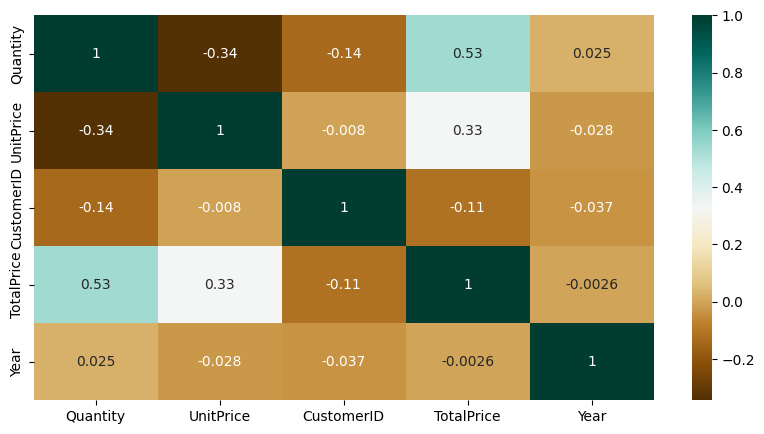

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c

<ipython-input-79-3f0e95437fce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_per_stockcode.index, y=quantity_per_stockcode.values, palette='viridis')


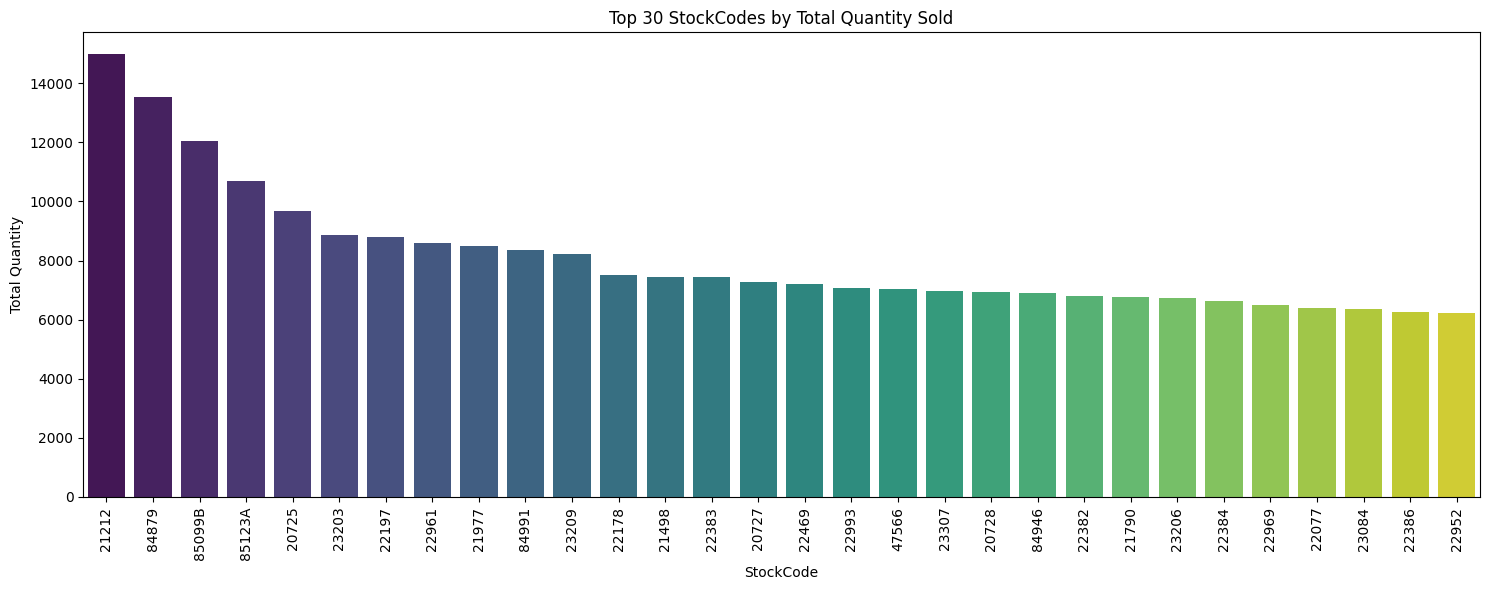

In [ ]:
# Calculate total quantity per StockCode (top 30 for clarity)
quantity_per_stockcode = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(15,6))
sns.barplot(x=quantity_per_stockcode.index, y=quantity_per_stockcode.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 30 StockCodes by Total Quantity Sold')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

<ipython-input-80-03d069884ea6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totalprice_per_stockcode.index, y=totalprice_per_stockcode.values, palette='magma')


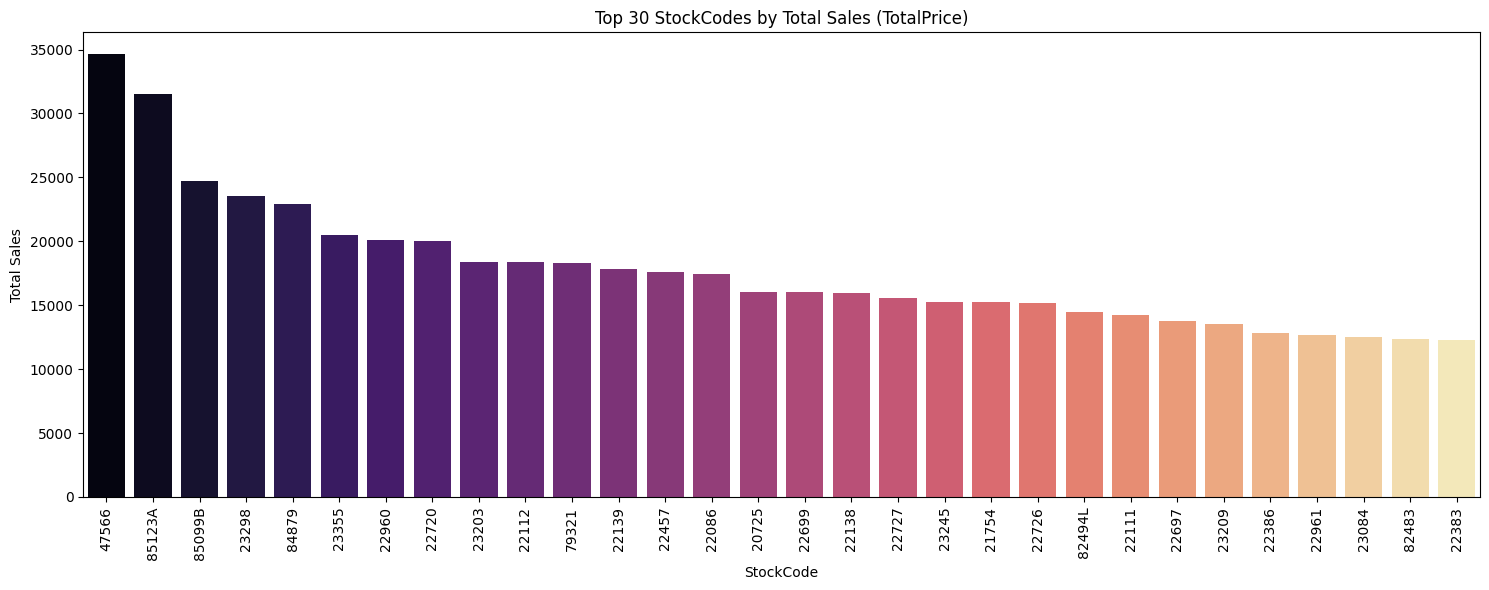

In [ ]:
# Calculate total sales per StockCode (top 30 for clarity)
totalprice_per_stockcode = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(15,6))
sns.barplot(x=totalprice_per_stockcode.index, y=totalprice_per_stockcode.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Top 30 StockCodes by Total Sales (TotalPrice)')
plt.xlabel('StockCode')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [ ]:
sales_per_month = df.groupby('Month')['Quantity'].sum().sort_values(ascending=False)

<ipython-input-82-269e9a4df6ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette='magma')


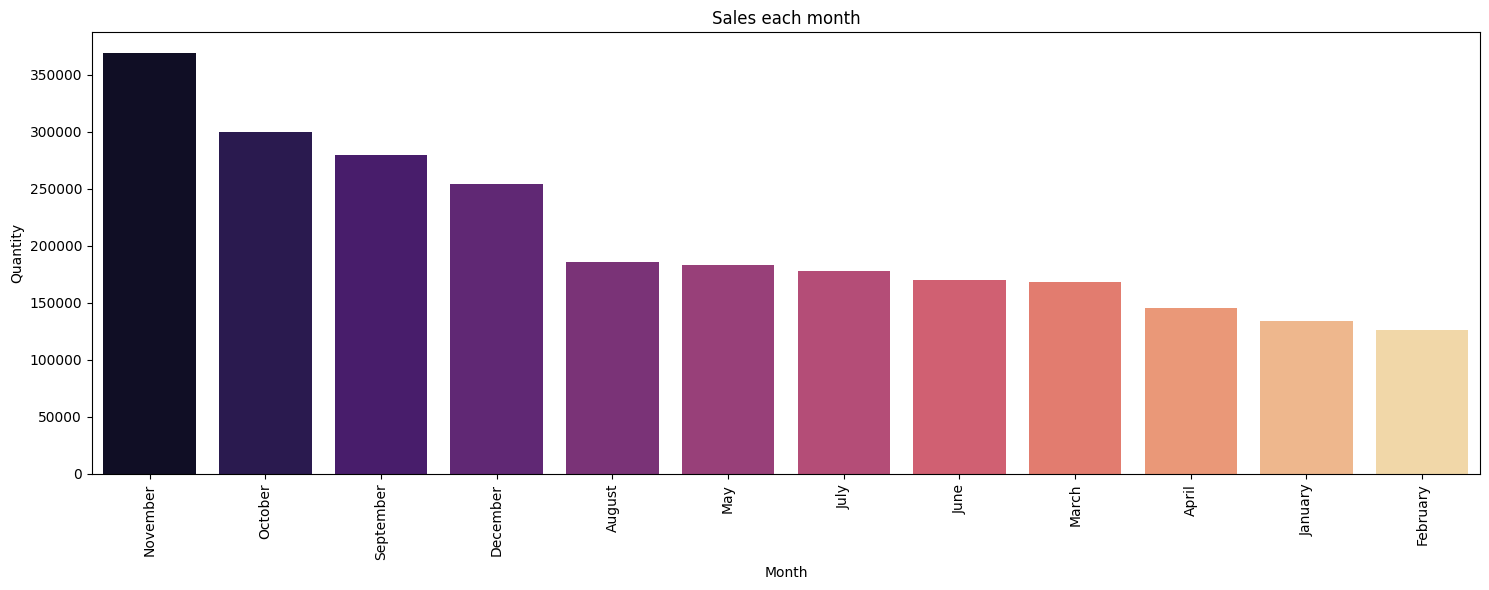

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Sales each month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

<ipython-input-83-faadf5b57408>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='magma')


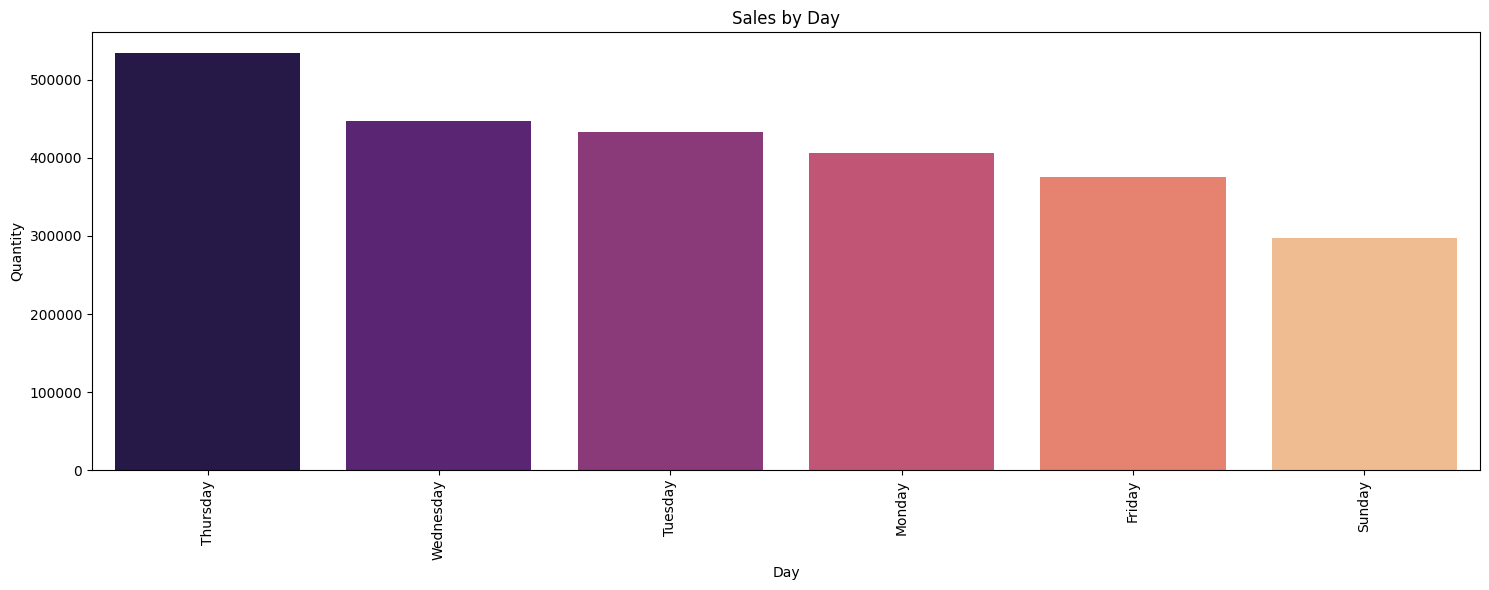

In [ ]:
sales_by_day = df.groupby('Day')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Sales by Day')
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

<ipython-input-84-92c2e21131b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='magma')


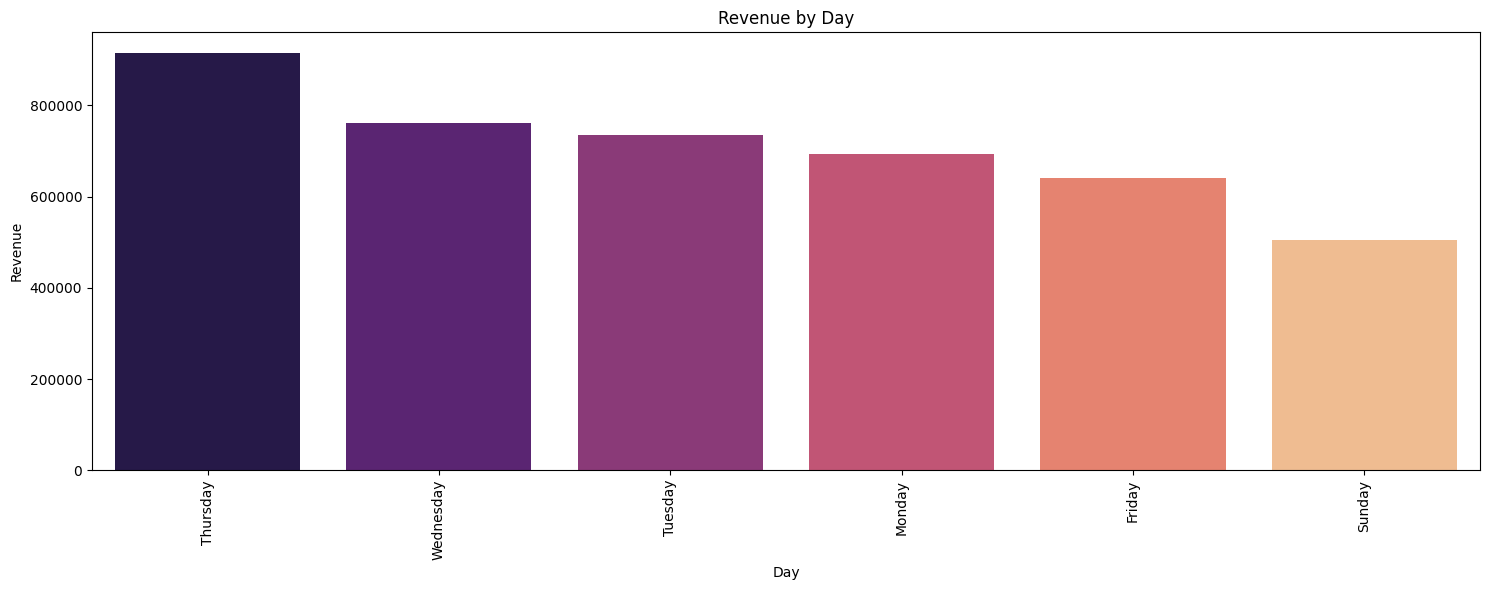

In [ ]:
revenue_by_day = df.groupby('Day')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Revenue by Day')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

<ipython-input-85-62b9c3025cae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Revenue_per_month.index, y=Revenue_per_month.values, palette='magma')


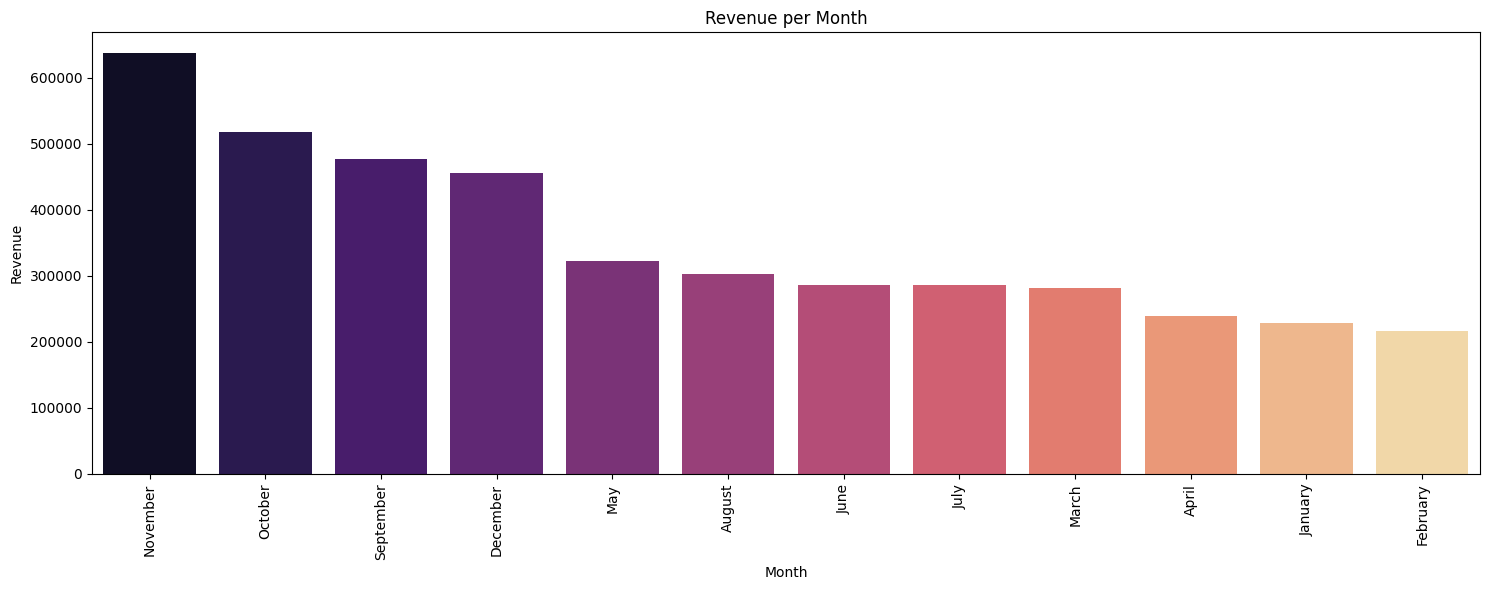

In [ ]:
Revenue_per_month = df.groupby('Month')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=Revenue_per_month.index, y=Revenue_per_month.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

<ipython-input-86-53a223ec267e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=november_quantity.index, y=november_quantity.values, palette='Blues_d')


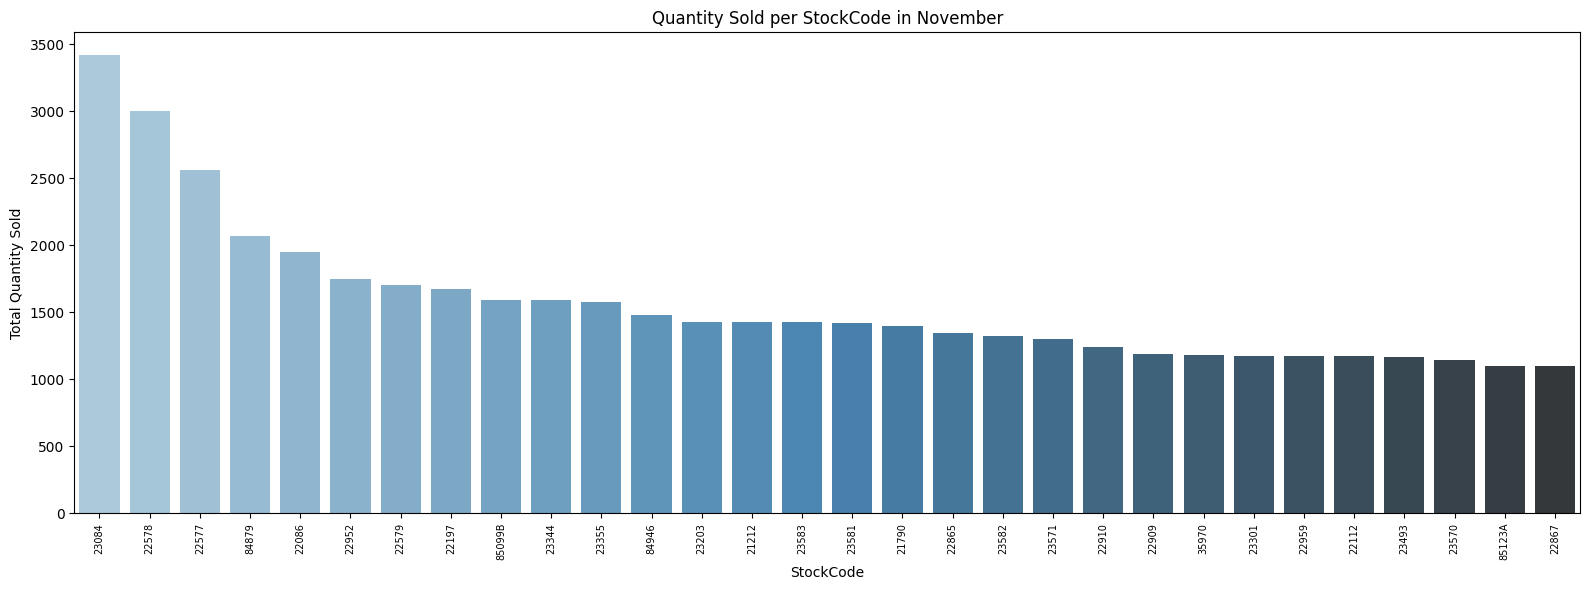

In [ ]:
november_df = df[df['Month'] == 'November']
november_quantity = november_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(30)
plt.figure(figsize=(16,6))
sns.barplot(x=november_quantity.index, y=november_quantity.values, palette='Blues_d')
plt.xticks(rotation=90, fontsize=7)
plt.title('Quantity Sold per StockCode in November')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

<ipython-input-87-0b6bd7053458>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thursday_quantity.index, y=thursday_quantity.values, palette='Greens_d')


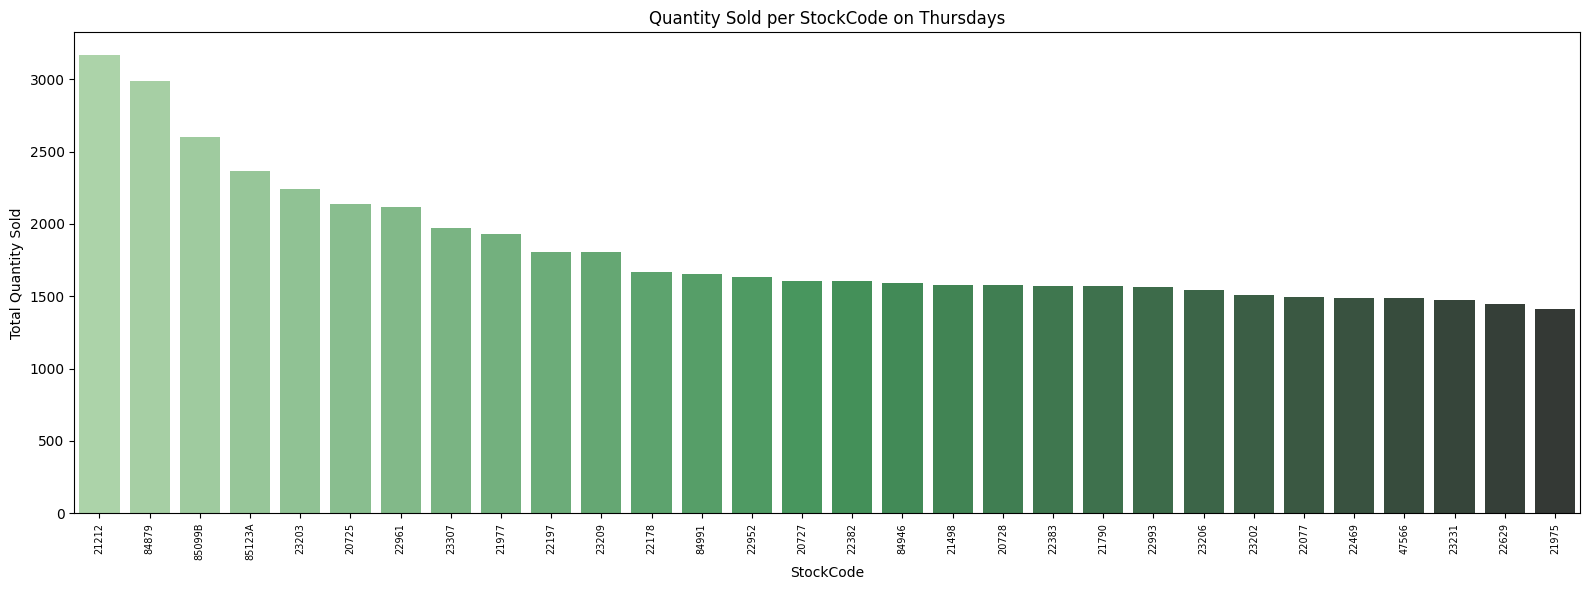

In [ ]:
thursday_df = df[df['Day'] == 'Thursday']
thursday_quantity = thursday_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(30)
plt.figure(figsize=(16,6))
sns.barplot(x=thursday_quantity.index, y=thursday_quantity.values, palette='Greens_d')
plt.xticks(rotation=90, fontsize=7)
plt.title('Quantity Sold per StockCode on Thursdays')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

In [ ]:
top_products_df = top_products.reset_index()
top_products_df.columns = ['StockCode', 'TotalQuantity']
top_products_df




,StockCode,TotalQuantity
0,21212,14971
1,84879,13542
2,85099B,12050
3,85123A,10703
4,20725,9674
5,23203,8858
6,22197,8781
7,22961,8599
8,21977,8493
9,84991,8371


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TotalQuantity'].plot(kind='hist', bins=20, title='TotalQuantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='TotalQuantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TotalQuantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TotalQuantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['TotalQuantity'].plot(kind='line', figsize=(8, 4), title='TotalQuantity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
top_revenue_products_df = top_revenue_products.reset_index()
top_revenue_products_df.columns = ['StockCode', 'TotalRevenue']
top_revenue_products_df

,StockCode,TotalRevenue
0,47566,34613.70
1,85123A,31533.61
2,85099B,24696.90
3,23298,23550.10
4,84879,22885.98
5,23355,20498.55
6,22960,20132.75
7,22720,20033.07
8,23203,18359.04
9,22112,18349.18


from matplotlib import pyplot as plt
_df_7['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['TotalRevenue'].plot(kind='hist', bins=20, title='TotalRevenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='index', y='TotalRevenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TotalRevenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TotalRevenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['TotalRevenue'].plot(kind='line', figsize=(8, 4), title='TotalRevenue')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
avg_order_value = df.groupby('InvoiceDate')['TotalPrice'].sum().mean()


In [ ]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales_df=country_sales.reset_index()
country_sales_df.columns = ['Country', 'TotalSales']
country_sales_df

,Country,TotalSales
0,United Kingdom,3639995.774
1,Germany,135569.200
2,France,121098.460
3,EIRE,104092.560
4,Switzerland,29636.660
5,Spain,29619.270
6,Belgium,27651.080
7,Portugal,20265.130
8,Norway,17961.580
9,Netherlands,15563.900


In [ ]:
product_quantity = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

product_quantity = product_quantity.rename(columns={'Quantity': 'TotalQuantity'})

product_quantity_sorted = product_quantity.sort_values(by='TotalQuantity', ascending=False)

print(product_quantity_sorted.head(10))

     StockCode                         Description  TotalQuantity
349      21212     PACK OF 72 RETROSPOT CAKE CASES          14971
2612     84879       ASSORTED COLOUR BIRD ORNAMENT          13542
3339    85099B             JUMBO BAG RED RETROSPOT          12050
3346    85123A  WHITE HANGING HEART T-LIGHT HOLDER          10678
97       20725             LUNCH BAG RED RETROSPOT           9674
1675     22961              JAM MAKING SET PRINTED           8599
817      21977  PACK OF 60 PINK PAISLEY CAKE CASES           8493
2641     84991         60 TEATIME FAIRY CAKE CASES           8371
976      22178     VICTORIAN GLASS HANGING T-LIGHT           7509
525      21498                 RED RETROSPOT WRAP            7447
